In [27]:
# Harshal M Pohekar

# Loan Prediction

# To Automate Loan Eligibility Process

# Classification Problem

# Objective - Whether To Approve Loan or Not

# Standard Supervised Classification Task - Whether The Loan Will Be Approved or Not

In [28]:
# Total 13 Attributes

# 12 are independents

# Loan_Status is dependent 

In [29]:
# Import Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Loading Dataset
train = pd.read_csv(r"D:\Downloads\Videos\Krish\Datasets\Loan Prediction\train_ctrUa4K.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [32]:
test = pd.read_csv(r"D:\Downloads\Videos\Krish\Datasets\Loan Prediction\test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [33]:
test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [34]:
# Statistics
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [35]:
# Datatypes and Null Counts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [36]:
# Separate Numeric and Categorical Values
numeric = train[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' ]]

categorical = train[['Gender', 'Married', 'Education',  'Self_Employed', 'Property_Area', 'Loan_Status']]

train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
# Preprocessing

# Finding Null Values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
# Fill Missing Values for Numerical Terms - by Mean
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [39]:
# Fill Missing Values for Categorical Terms - by Mode
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [40]:
# Checking Null Values
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<ipython-input-41-a31d3c343a18>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(332)


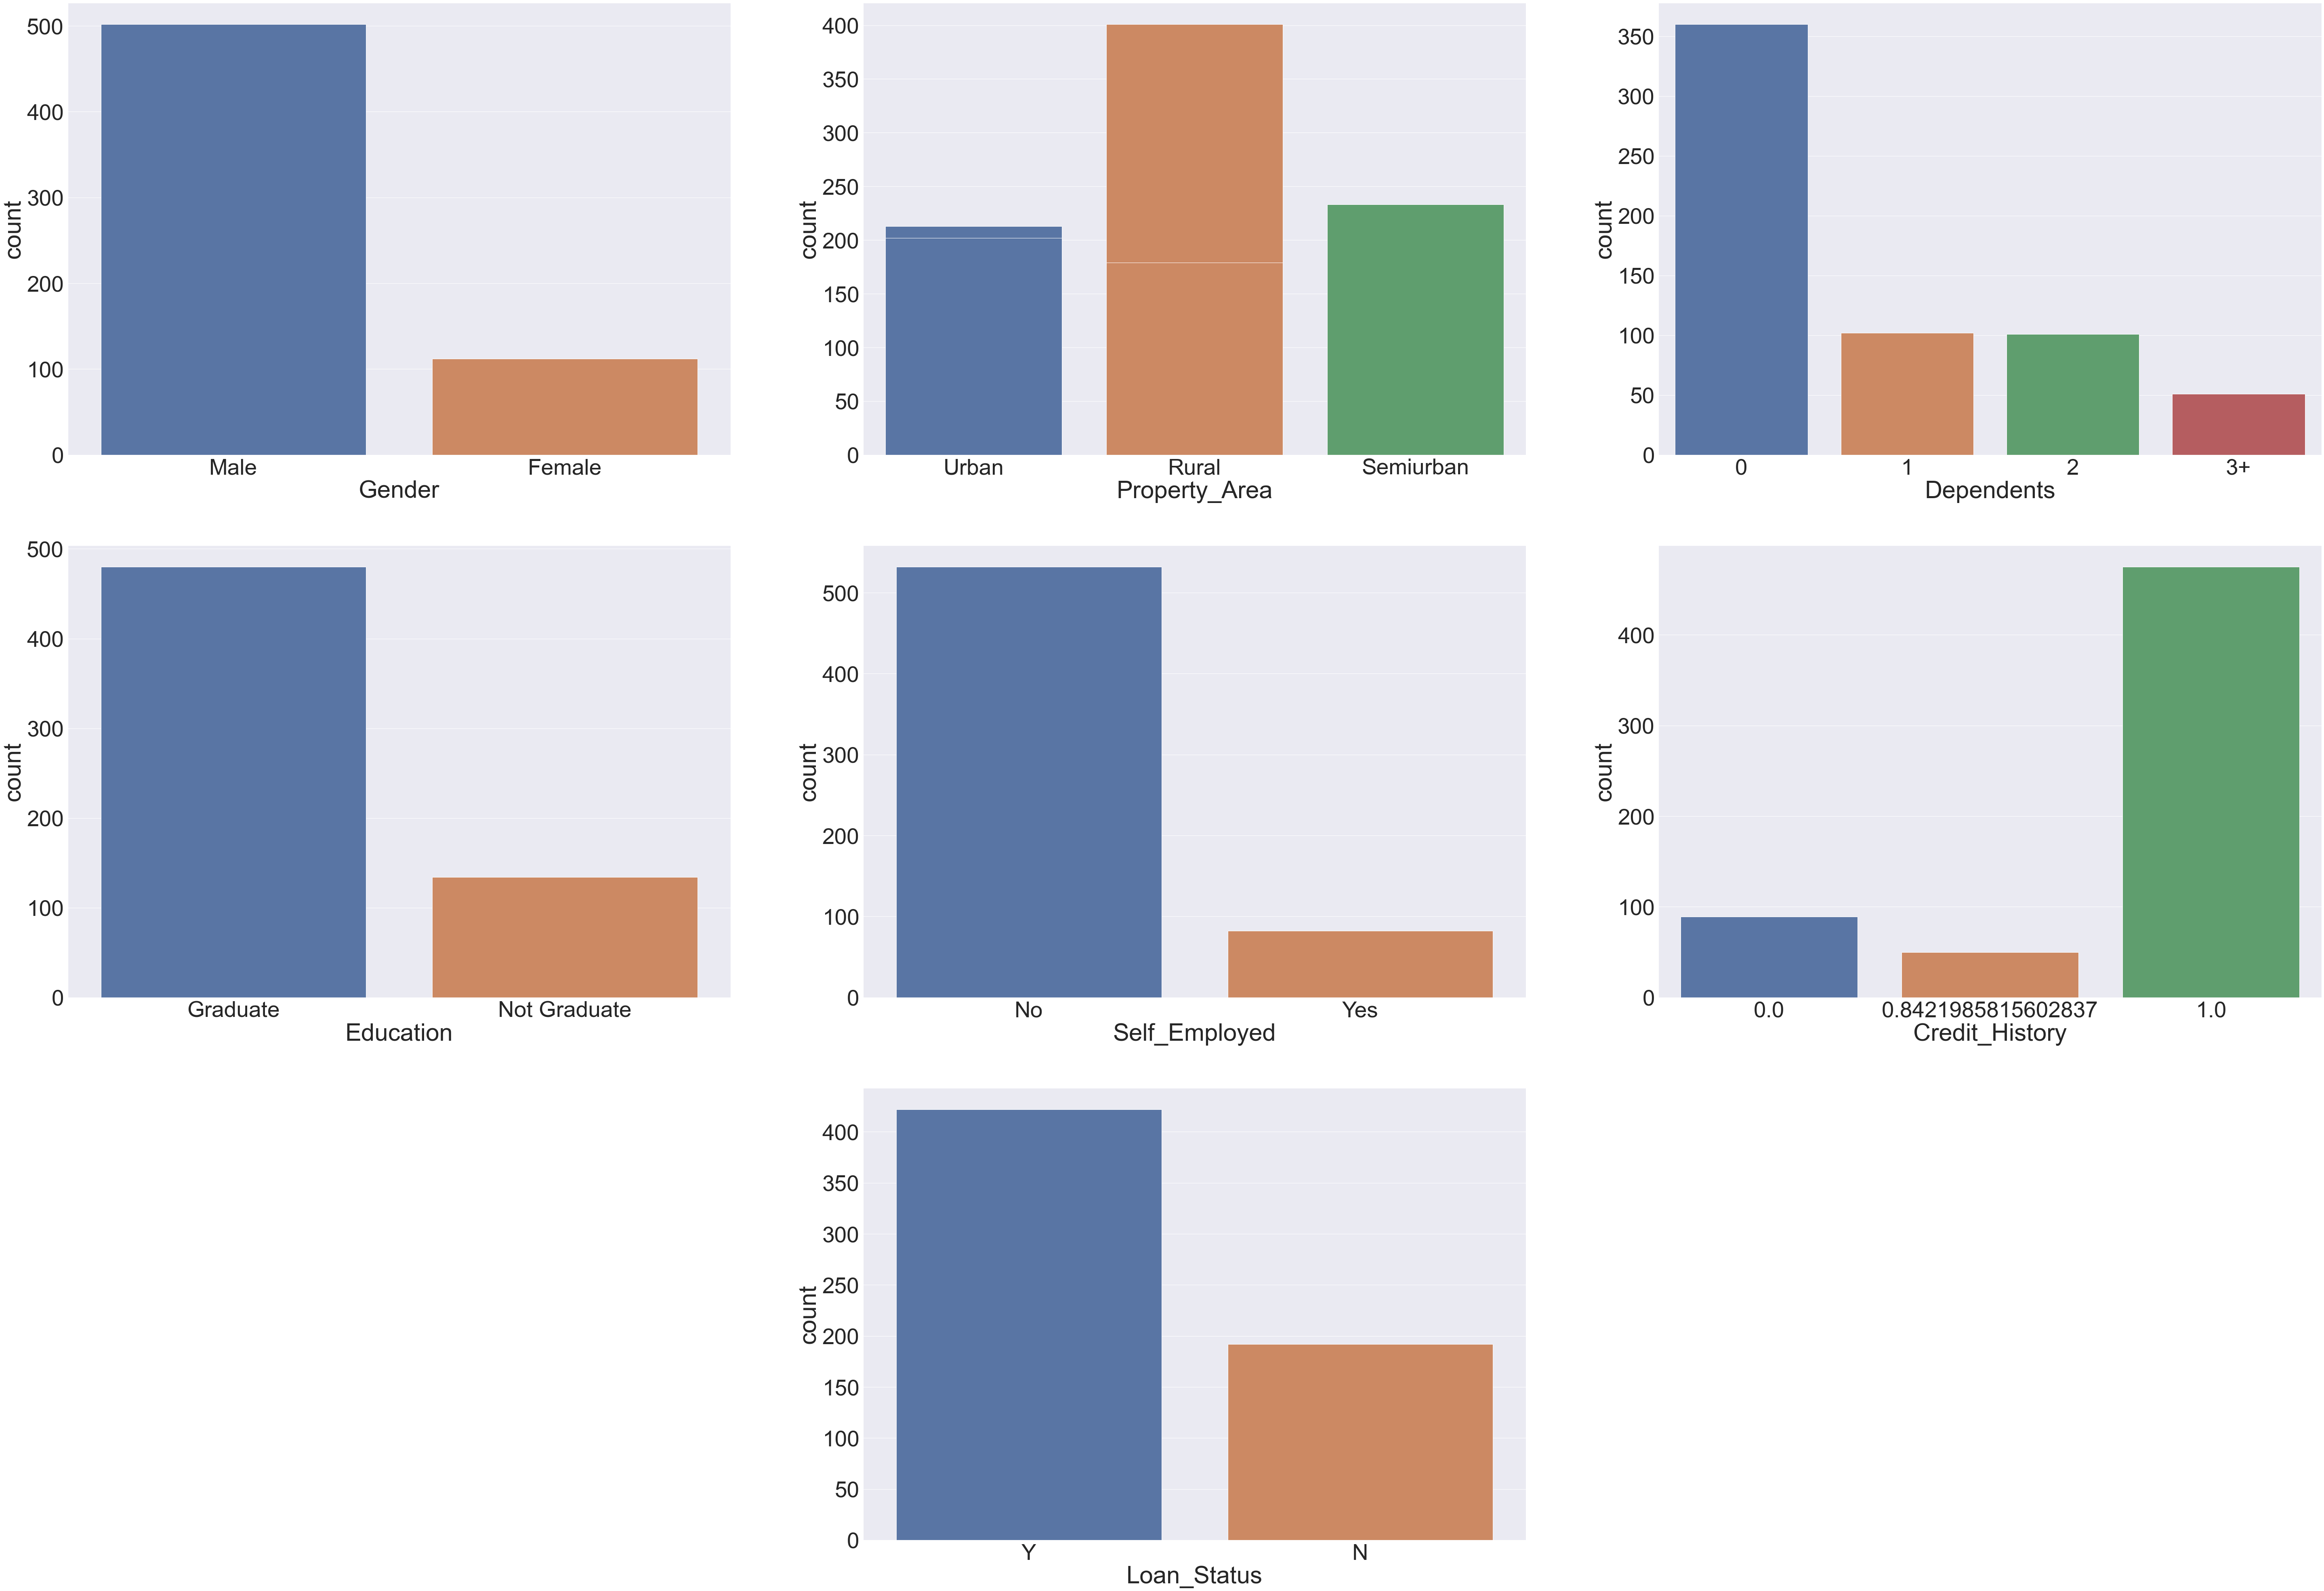

In [41]:
# Exploratory Data Analysis

# Count plot for categorical visualization

plt.figure(figsize = (100,70))
sns.set(font_scale = 5)

plt.subplot(331)
sns.countplot(train['Gender'])

plt.subplot(332)
sns.countplot(train['Married'])

plt.subplot(333)
sns.countplot(train['Dependents'])

plt.subplot(334)
sns.countplot(train['Education'])

plt.subplot(335)
sns.countplot(train['Self_Employed'])

plt.subplot(336)
sns.countplot(train['Credit_History'])

plt.subplot(332)
sns.countplot(train['Property_Area'])

plt.subplot(338)
sns.countplot(train['Loan_Status'])

In [ ]:
#categorical = train[['Gender', 'Married', 'Education',  'Self_Employed', 'Property_Area', 'Loan_Status']]

#for i in categorical:
#    sns.countplot(categorical[i])
#    plt.title(i)
#    plt.show()

D:\Installations\IDEs\Conda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


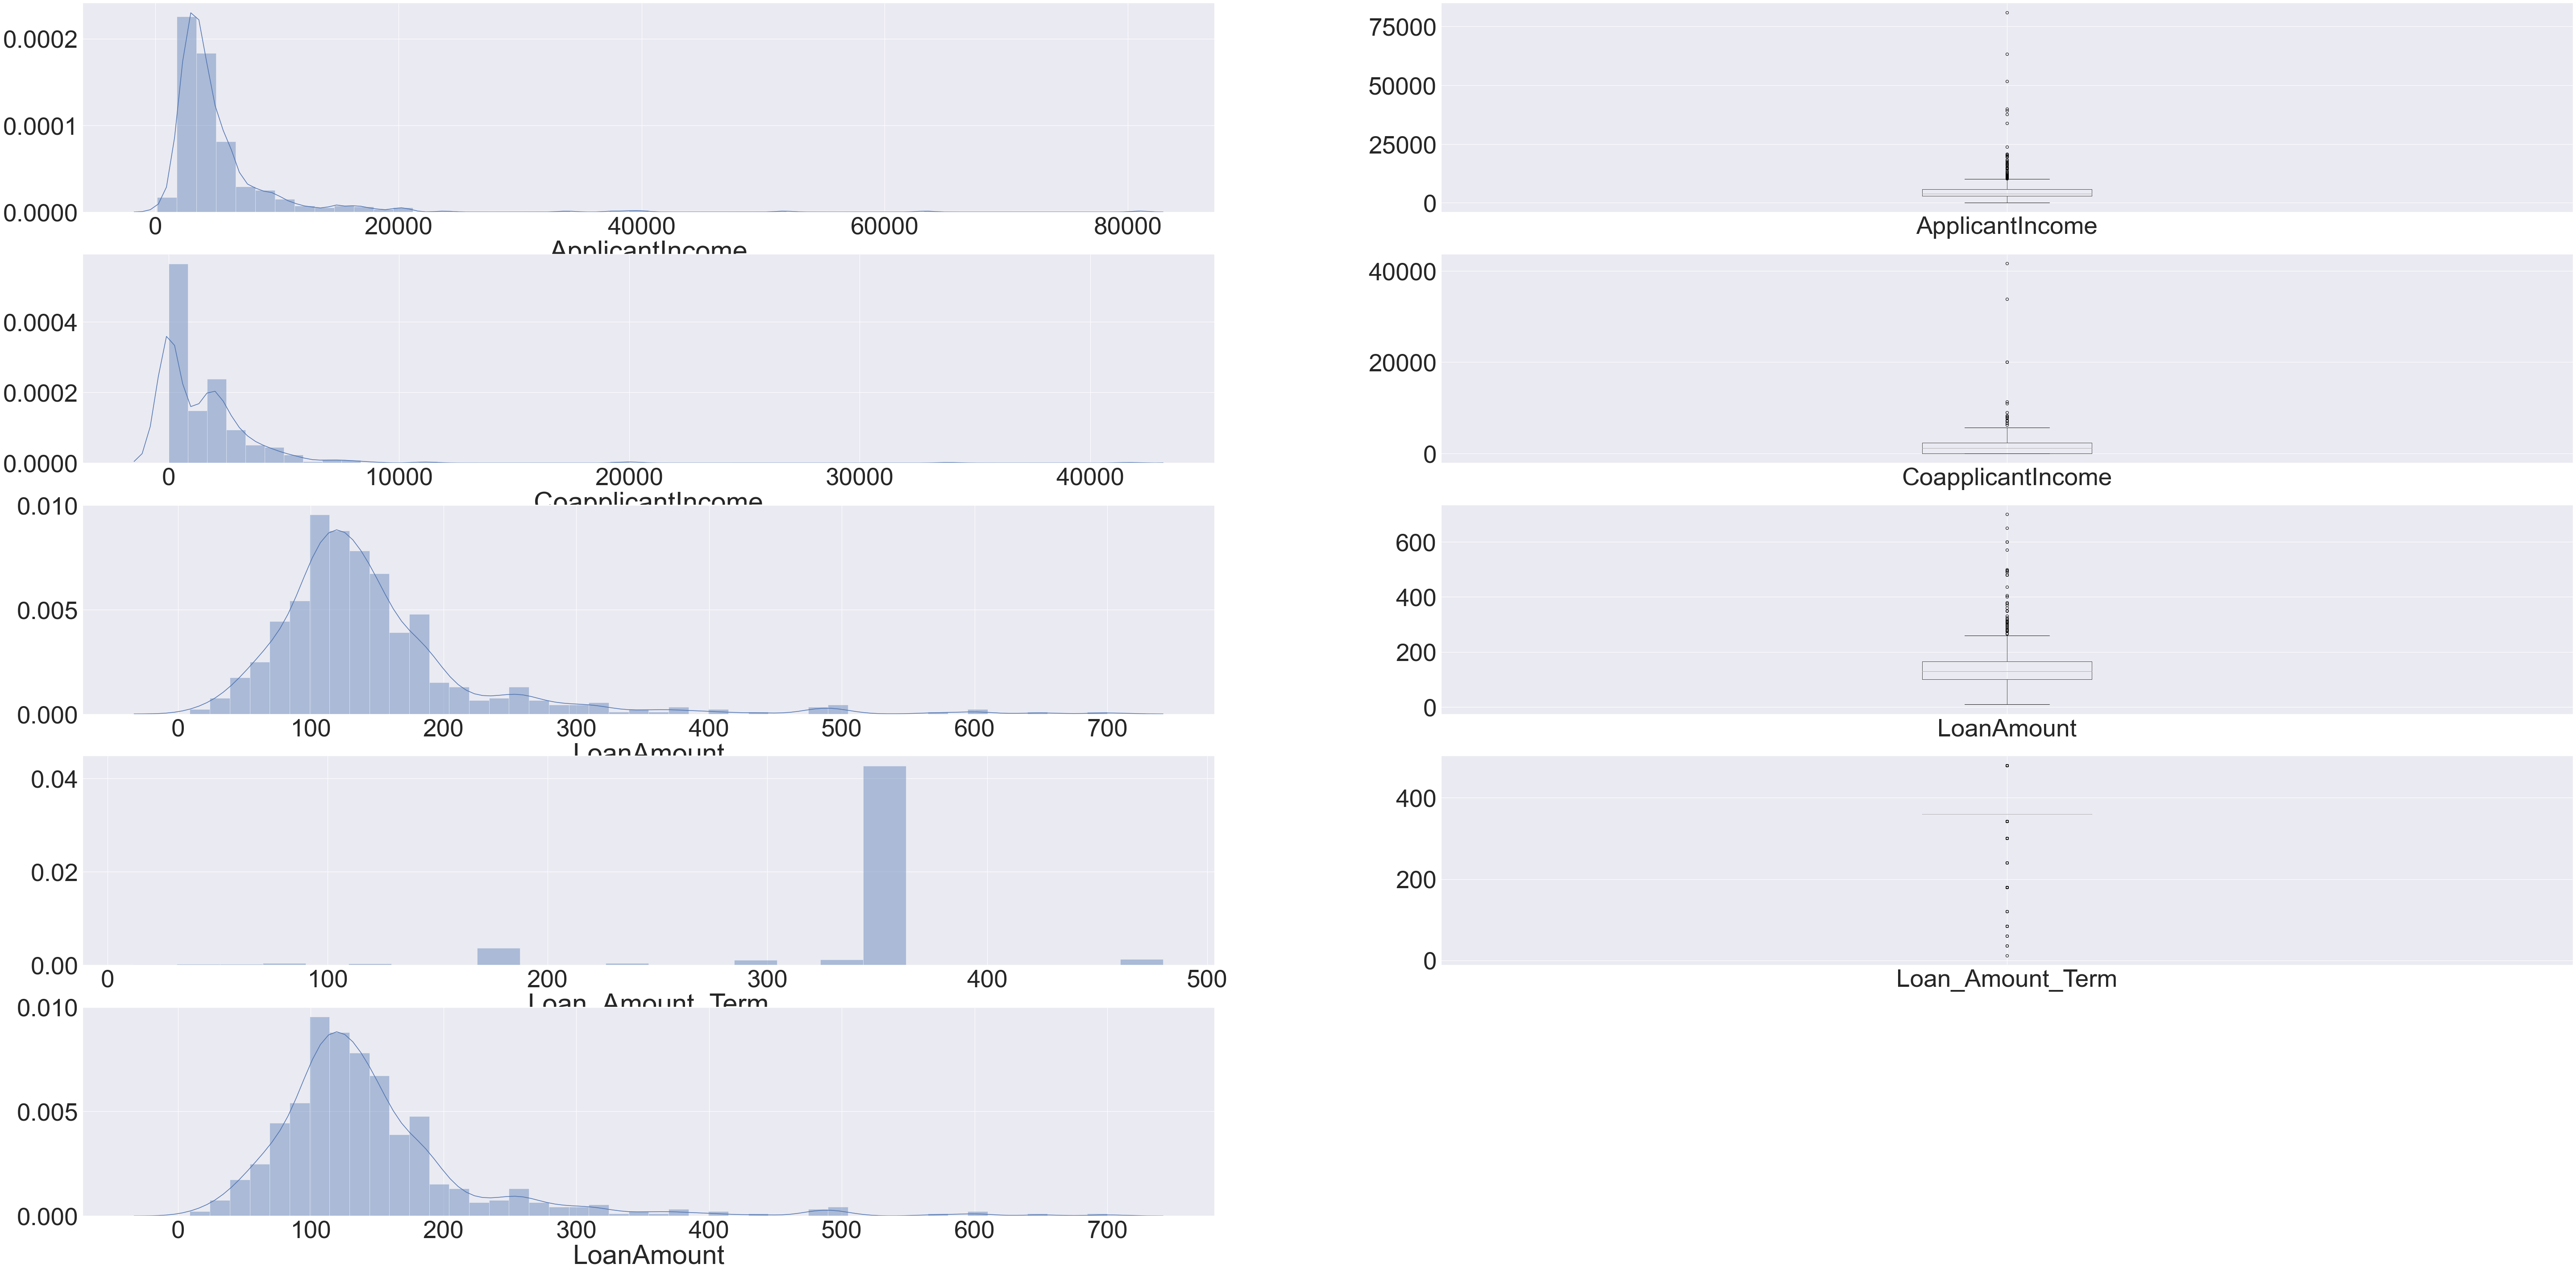

In [42]:
# Numerical Attribute Visualization
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)

plt.subplot(521)
sns.distplot(train['ApplicantIncome'])

plt.subplot(522)
train.boxplot(column='ApplicantIncome')

plt.subplot(523)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(524)
train.boxplot(column='CoapplicantIncome')

plt.subplot(525)
sns.distplot(train['LoanAmount'])

plt.subplot(526)
train.boxplot(column='LoanAmount')

plt.subplot(527)
sns.distplot(train['Loan_Amount_Term'])

plt.subplot(528)
train.boxplot(column='Loan_Amount_Term')

plt.subplot(529)
sns.distplot(train['LoanAmount'])

#plt.subplot(52)
#train.boxplot(column='LoanAmount')

In [43]:
# Creating new attribute
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


D:\Installations\IDEs\Conda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


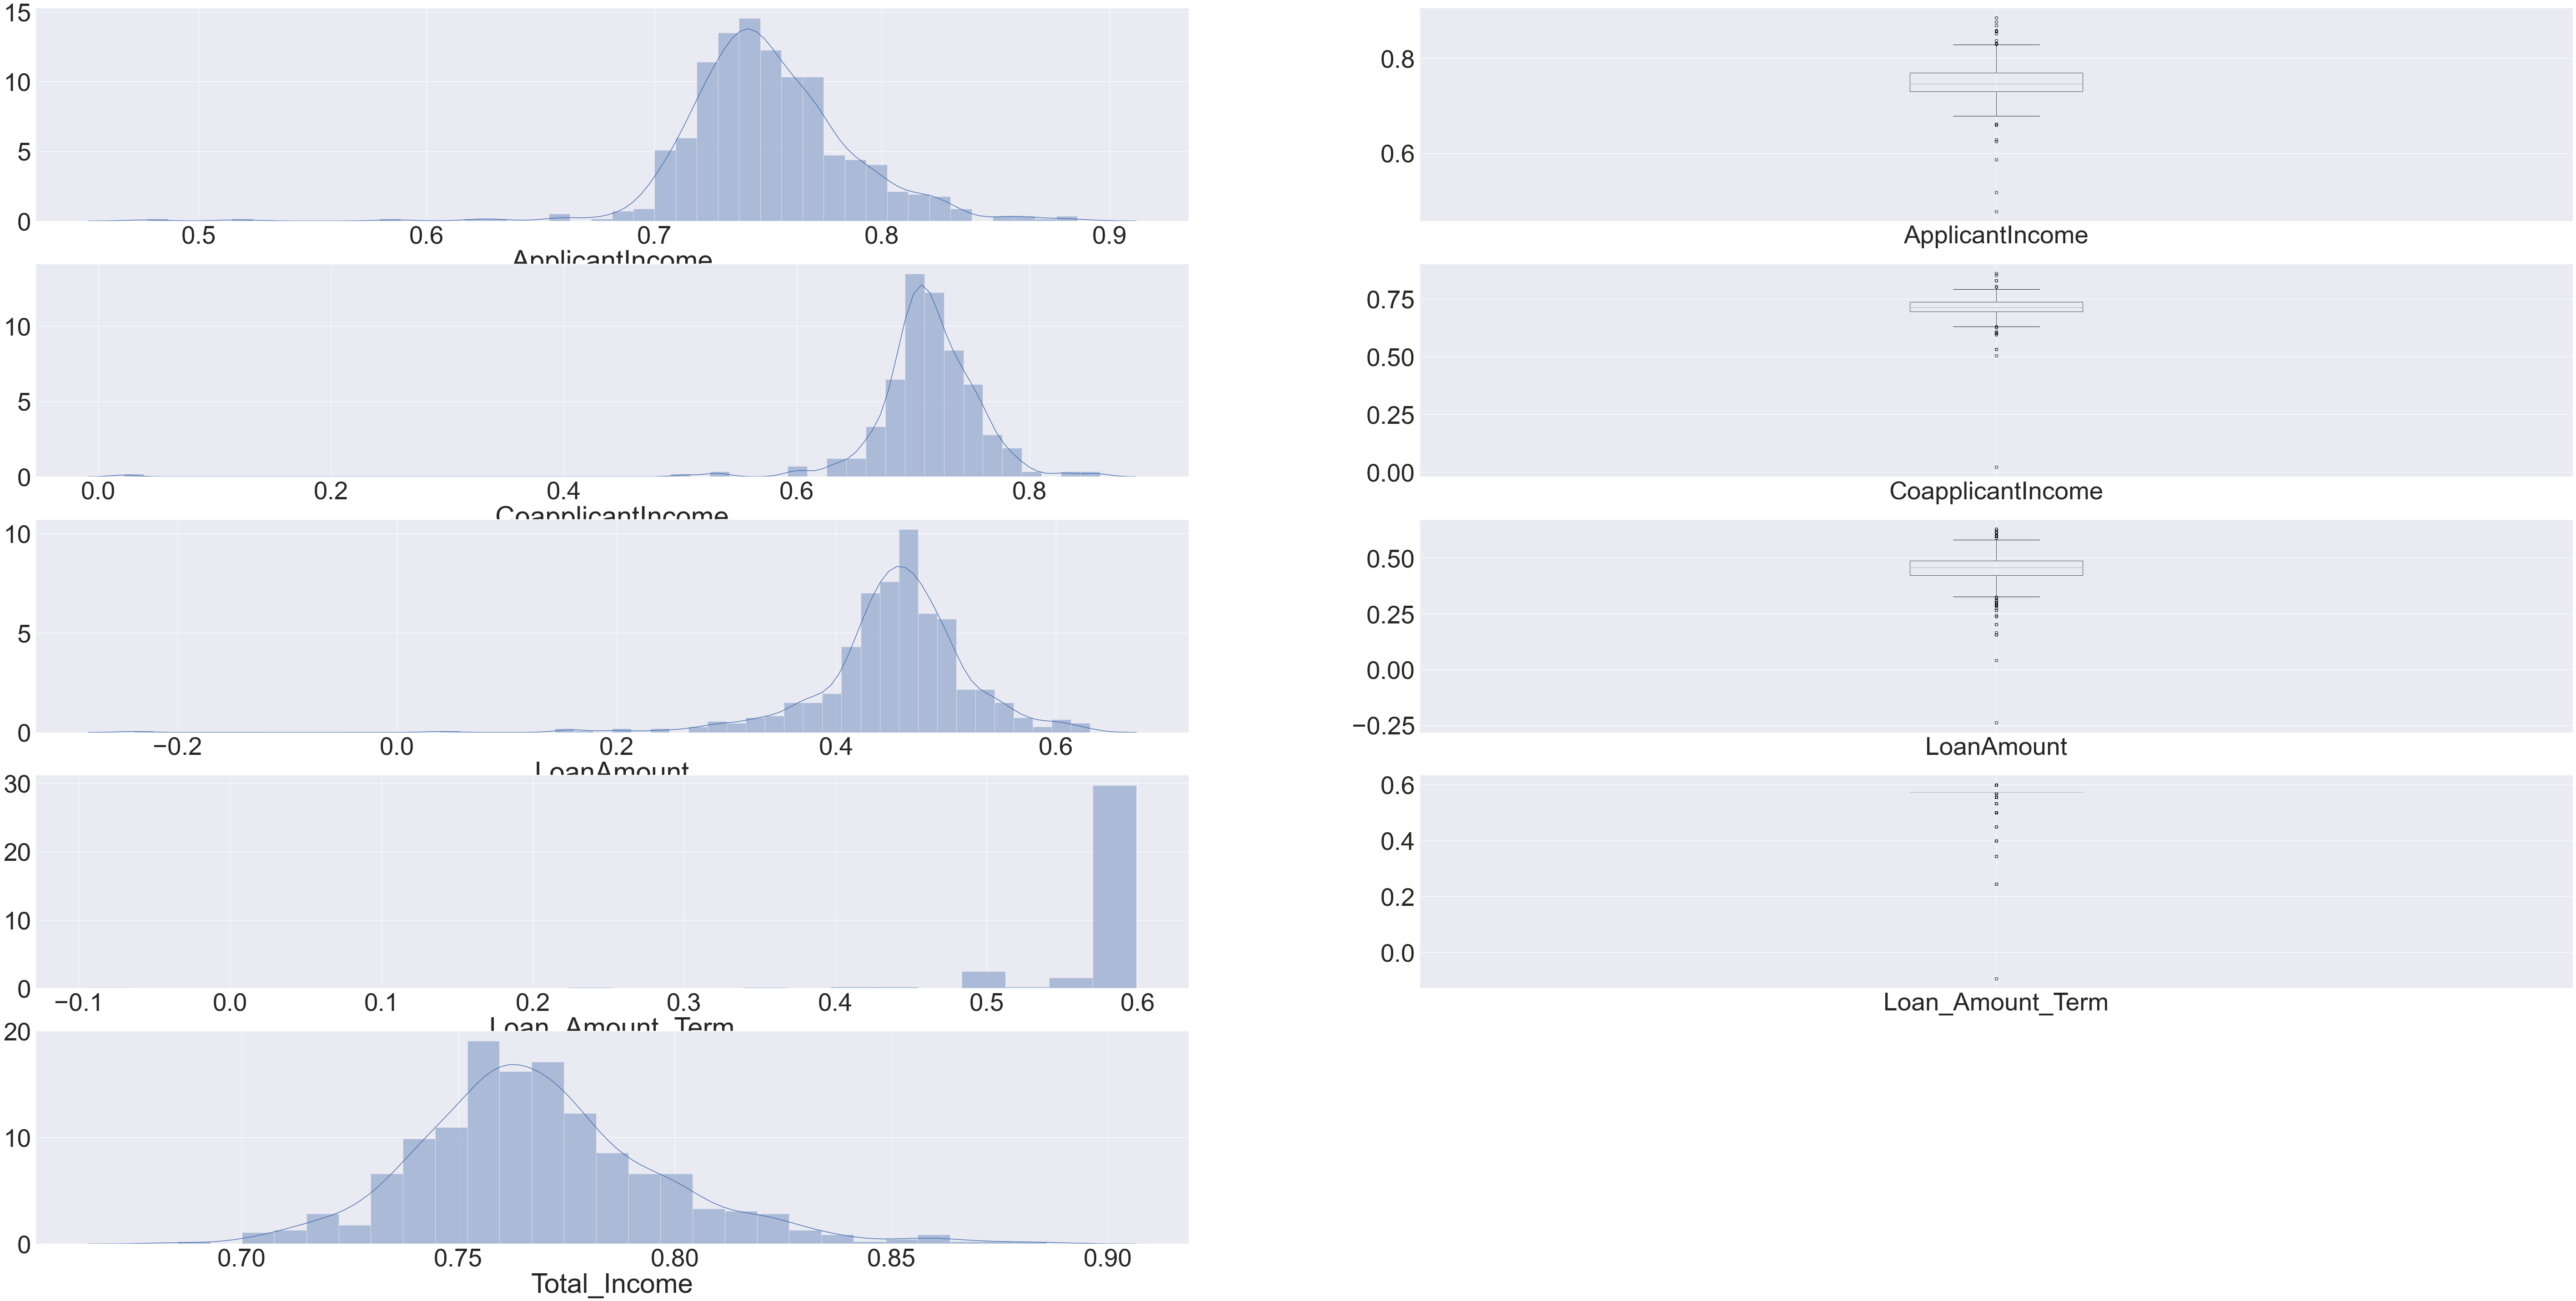

In [46]:
# Normalization - Applying log transformation to attribute

train['ApplicantIncome'] = np.log(train['ApplicantIncome'])

train['CoapplicantIncome'] = np.log(train['CoapplicantIncome'])

train['LoanAmount'] = np.log(train['LoanAmount'])

train['Loan_Amount_Term'] = np.log(train['Loan_Amount_Term'])

train['Total_Income'] = np.log(train['Total_Income'])

plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)

plt.subplot(521)
sns.distplot(train['ApplicantIncome'])

plt.subplot(522)
train.boxplot(column='ApplicantIncome')

plt.subplot(523)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(524)
train.boxplot(column='CoapplicantIncome')

plt.subplot(525)
sns.distplot(train['LoanAmount'])

plt.subplot(526)
train.boxplot(column='LoanAmount')

plt.subplot(527)
sns.distplot(train['Loan_Amount_Term'])

plt.subplot(528)
train.boxplot(column='Loan_Amount_Term')

plt.subplot(529)
sns.distplot(train['Total_Income'])

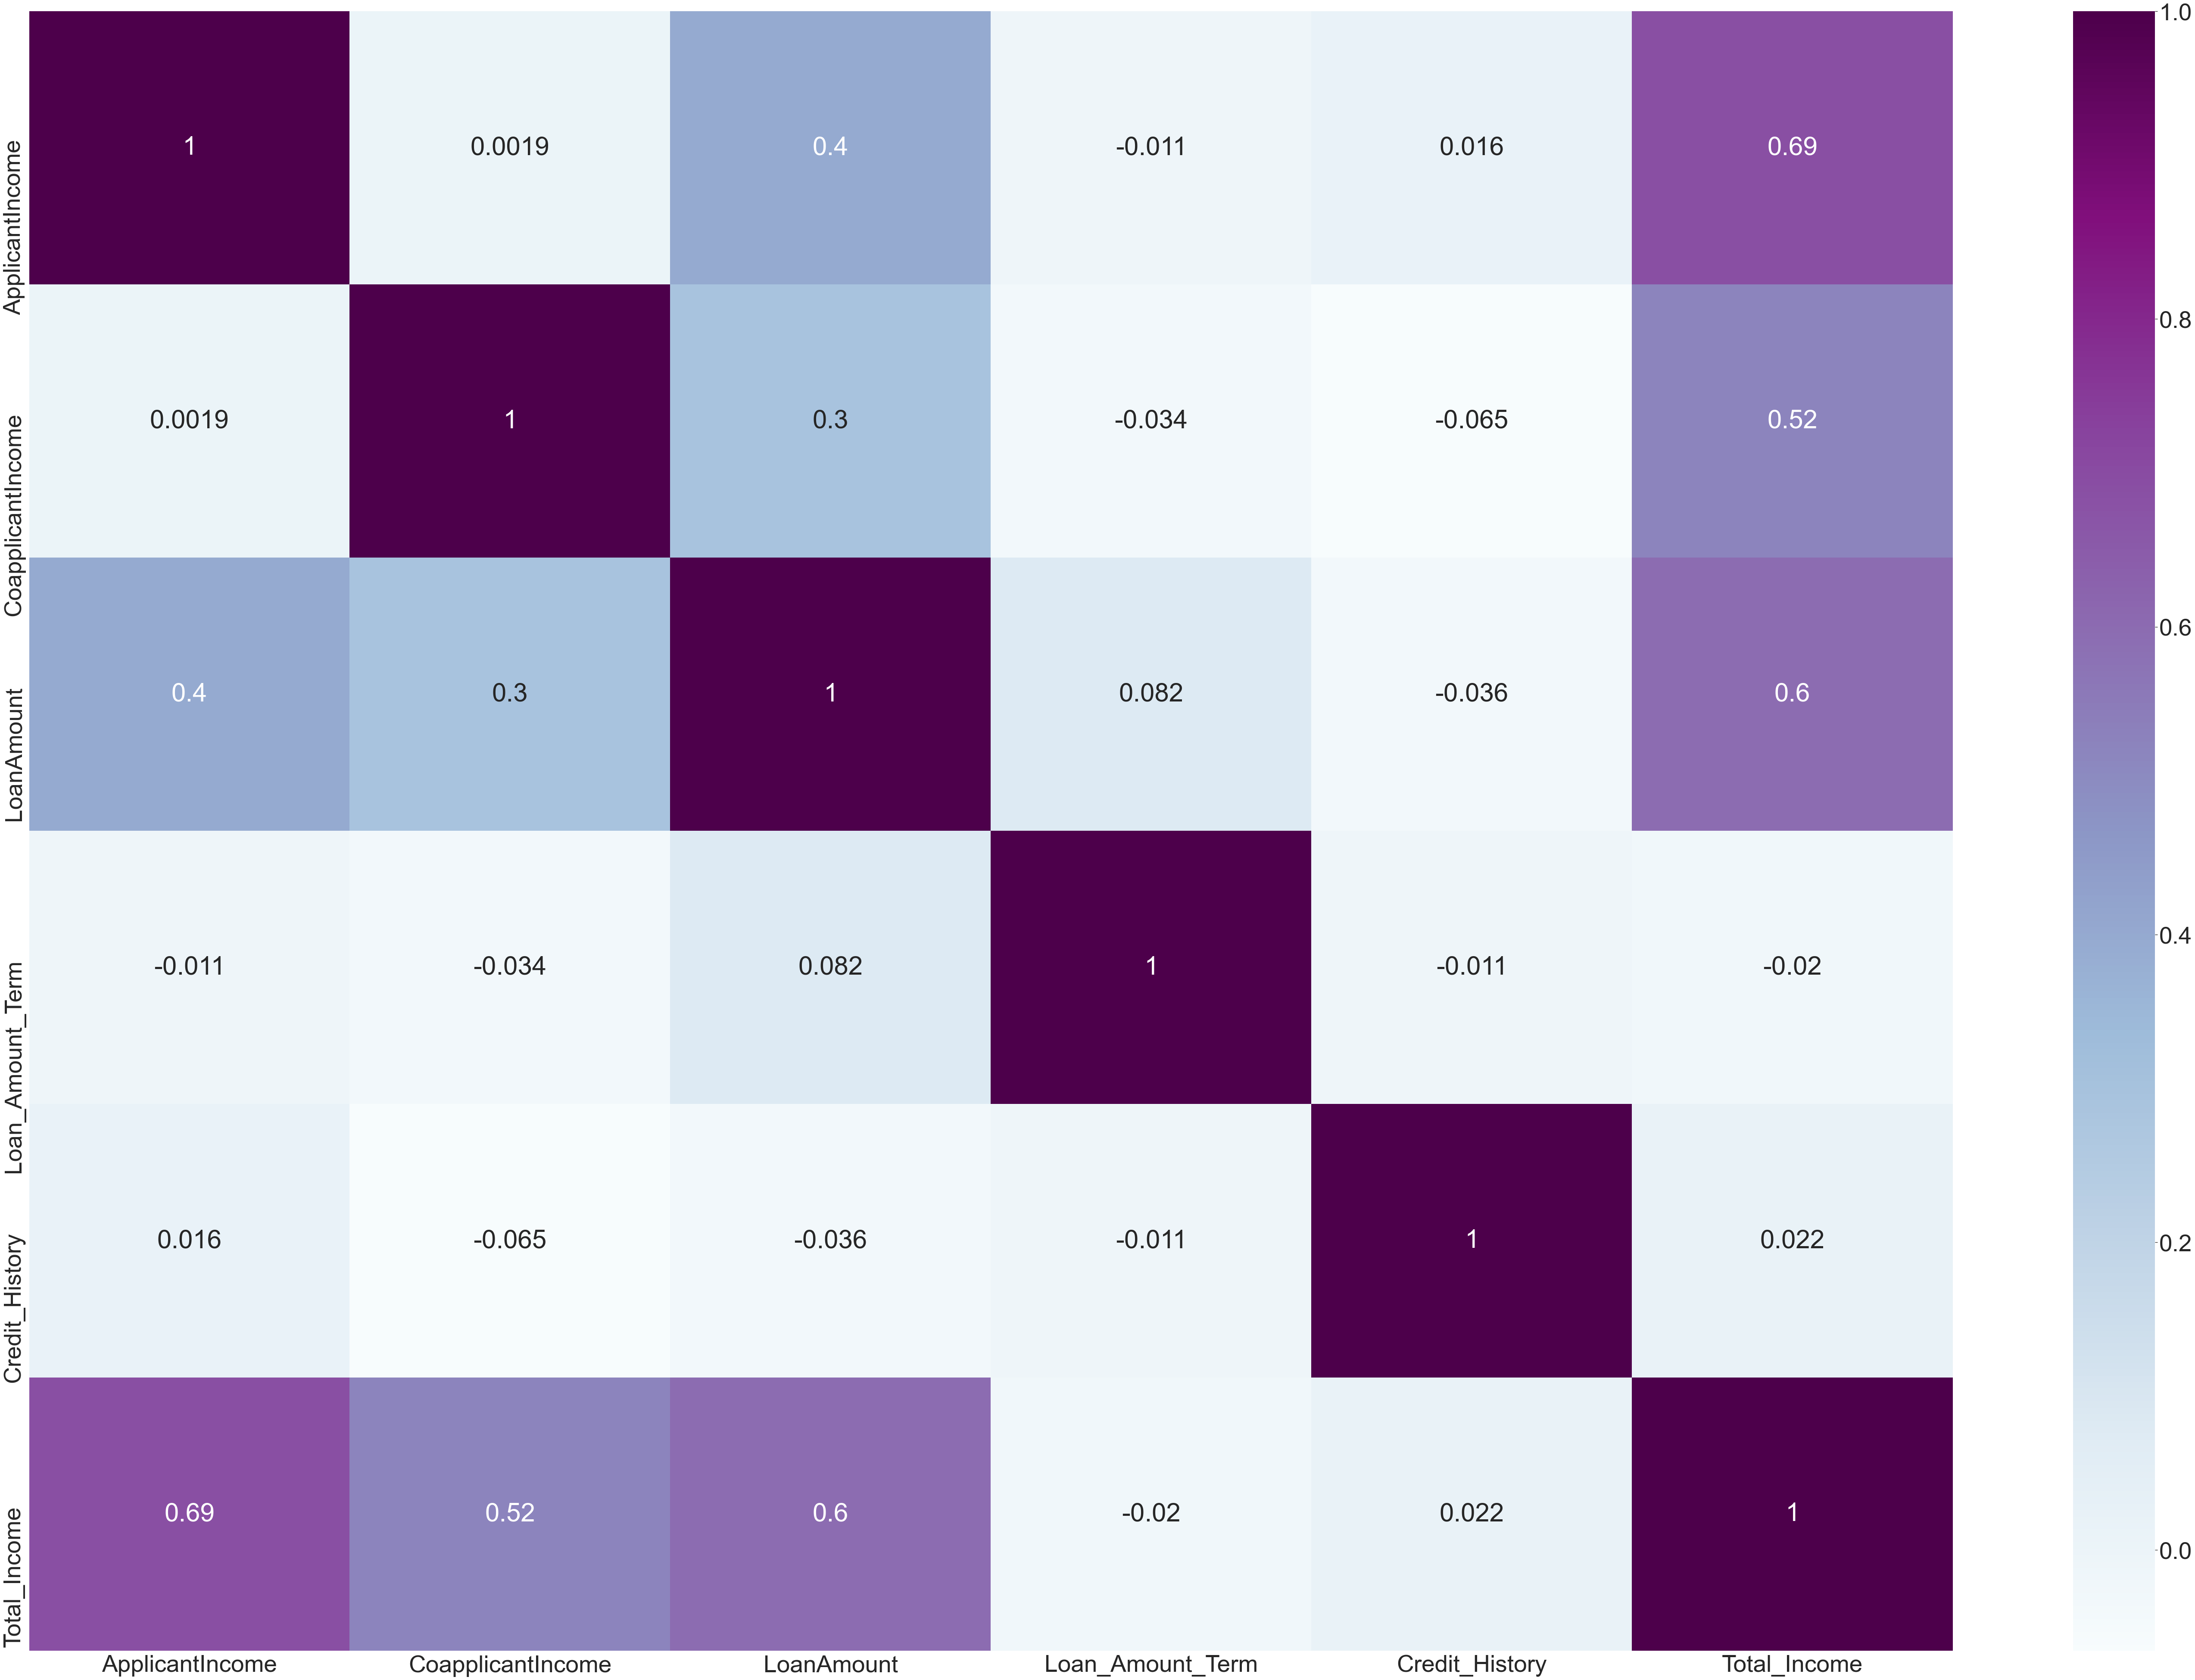

In [47]:
# Corelation Matrix
corr = train.corr()
plt.figure(figsize = (100, 70))
sns.heatmap(corr, annot=True, cmap = 'BuPu')

In [48]:
# Comparision across Loan Statuts and other parameters

pd.pivot_table(train, index = 'Loan_Status', values = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Loan_Status,,,,,
N,0.749001,0.722581,0.562232,0.455897,0.562797
Y,0.750319,0.707127,0.969577,0.450803,0.562271


In [49]:
# High Density = Highly Corelated

# Removing High Density Columns
# Axis = 1 means deleting columns
# Axis = 0, means deleting row wise

cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_ID']
train = train.drop(columns = cols, axis = 1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,0.572444,1.0,Urban,Y,0.770262
1,Male,Yes,1,Graduate,No,0.572444,1.0,Rural,N,0.772419
2,Male,Yes,0,Graduate,Yes,0.572444,1.0,Urban,Y,0.732482
3,Male,Yes,0,Not Graduate,No,0.572444,1.0,Urban,Y,0.761129
4,Male,No,0,Graduate,No,0.572444,1.0,Urban,Y,0.771620


In [50]:
# Label Encoding

# Converting Categorical to Numeric

from sklearn.preprocessing import LabelEncoder

# Initalizing Encoder
le = LabelEncoder()

cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in cols:
    train[col] = le.fit_transform(train[col])
    
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,0.572444,1.0,2,1,0.770262
1,1,1,1,0,0,0.572444,1.0,0,0,0.772419
2,1,1,0,0,1,0.572444,1.0,2,1,0.732482
3,1,1,0,1,0,0.572444,1.0,2,1,0.761129
4,1,0,0,0,0,0.572444,1.0,2,1,0.771620


In [53]:
# Specify input and output attributes
x = train.drop(columns = ['Loan_Status'], axis =1)
y = train['Loan_Status']

In [54]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Random state hyper parameter , to have same split and avoid different results at different runs
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state = 42)

In [55]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns = x.columns)

In [56]:
# Model Training
from sklearn.model_selection import cross_val_score


# Reusing classify function

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state = 42)
    model.fit(x_train, y_train)
    print('Accuracy by', model, 'is : ', model.score(x_test, y_test)*100)
    
    # cross validation - better validation of model
    # CV = 5, train = 4, test = 1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation score is: ", np.mean(score)*100)

In [57]:
# Model Selection

# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy by LogisticRegression() is :  78.86178861788618
Cross validation score is:  80.9462881514061


In [58]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy by DecisionTreeClassifier() is :  68.29268292682927
Cross validation score is:  70.36652005864322


In [59]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy by RandomForestClassifier() is :  70.73170731707317
Cross validation score is:  75.74037051845927


In [60]:
# Extra Tree Classifier
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy by ExtraTreesClassifier() is :  69.91869918699187
Cross validation score is:  72.47900839664135


In [61]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classify(model, x, y)

Accuracy by GaussianNB() is :  78.04878048780488
Cross validation score is:  81.27282420365188


In [62]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model, x, y)

Accuracy by KNeighborsClassifier() is :  73.17073170731707
Cross validation score is:  74.27429028388644


In [63]:
# SVM
from sklearn.svm import SVC
model = SVC()
classify(model, x, y)

Accuracy by SVC() is :  78.86178861788618
Cross validation score is:  80.9462881514061


In [64]:
# Hyper Parameter Tuning

model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=5, max_features=1)
classify(model, x, y)

Accuracy by RandomForestClassifier(max_depth=5, max_features=1, min_samples_split=25,
                       n_estimators=25) is :  78.86178861788618
Cross validation score is:  78.66986538717848


In [65]:
model = RandomForestClassifier(n_estimators=50, min_samples_split=25, max_depth=5, max_features=1)
classify(model, x, y)

Accuracy by RandomForestClassifier(max_depth=5, max_features=1, min_samples_split=25,
                       n_estimators=50) is :  77.23577235772358
Cross validation score is:  79.48020791683327


In [66]:
model = RandomForestClassifier(n_estimators=75, min_samples_split=25, max_depth=5, max_features=1)
classify(model, x, y)

Accuracy by RandomForestClassifier(max_depth=5, max_features=1, min_samples_split=25,
                       n_estimators=75) is :  78.86178861788618
Cross validation score is:  80.45848327335733


In [67]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=5, max_features=1)
classify(model, x, y)

Accuracy by RandomForestClassifier(max_depth=5, max_features=1, min_samples_split=25) is :  78.86178861788618
Cross validation score is:  80.78368652538984


In [68]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()

x_train = pca.fit_transform(x_train)
pca.explained_variance_ratio_

array([0.18799899, 0.14010615, 0.11961672, 0.11672473, 0.11147048,
       0.09650796, 0.08943716, 0.07036499, 0.06777283])

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% variance is: ', dim)

The number of dimensions required to preserve 90% variance is:  8


In [70]:
# Confusion Matrix
# Summary of correct and incorrect predictions made by classifier and broken down by class
# gives insights about types of errors 

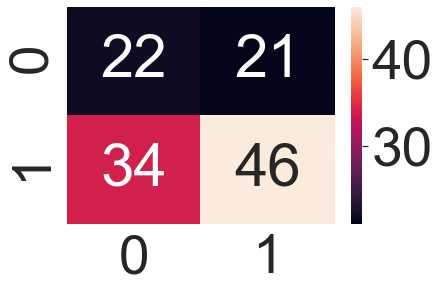

In [71]:
from sklearn.metrics import confusion_matrix
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# left actual values, right predicted values
# left diagonal correct for class 0 (0,0)
# left diagonal correct for class 1 (1,1)

# right diagonal incorrect for class 0 (0,1)
# right diagonal incorrect for class 1 (1,0)
sns.heatmap(cm, annot = True) # annot to display number